## KELOMPOK 1
# ANGGOTA KELOMPOK :
1. HASNA ANNISA HAZMI
2. ARTA DEKA A
3. MUHAMAD MINANUR ROHMAN
4. HELMI APRIANTO
5. BAROATUL KHOFIFAH
6. YOGA PRATAMA

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
import tensorflow as tf
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SUHUKEL1.csv') # Please change this directory

In [ ]:
df

,Tanggal,Waktu,Suhu (C),Kelembaban (%)
0,8/31/2023,14.01.21,28.8,88.4
1,8/31/2023,14.02.21,28.8,88.5
2,8/31/2023,14.03.21,28.9,88.5
3,8/31/2023,14.04.21,28.8,88.5
4,8/31/2023,14.05.21,28.9,88.3
...,...,...,...,...
9901,11/22/2023,16.03.21,29.1,91.6
9902,11/22/2023,16.04.21,29.1,91.2
9903,11/22/2023,16.05.21,29.1,91
9904,11/22/2023,16.06.21,29.2,91.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         9906 non-null   object 
 1   Waktu           9906 non-null   object 
 2   Suhu (C)        9906 non-null   float64
 3   Kelembaban (%)  9906 non-null   object 
dtypes: float64(1), object(3)
memory usage: 309.7+ KB


In [ ]:
df[['Tanggal', 'Waktu', 'Suhu (C)', 'Kelembaban (%)']]

,Tanggal,Waktu,Suhu (C),Kelembaban (%)
0,8/31/2023,14.01.21,28.8,88.4
1,8/31/2023,14.02.21,28.8,88.5
2,8/31/2023,14.03.21,28.9,88.5
3,8/31/2023,14.04.21,28.8,88.5
4,8/31/2023,14.05.21,28.9,88.3
...,...,...,...,...
9901,11/22/2023,16.03.21,29.1,91.6
9902,11/22/2023,16.04.21,29.1,91.2
9903,11/22/2023,16.05.21,29.1,91
9904,11/22/2023,16.06.21,29.2,91.1


In [ ]:
df['Datetime'] = pd.to_datetime(df['Tanggal'] + ' ' + df['Waktu'], format='%m/%d/%Y %H.%M.%S')

In [ ]:
df = df.drop(columns=['Tanggal', 'Waktu'])

In [ ]:
df

,Suhu (C),Kelembaban (%),Datetime
0,28.8,88.4,2023-08-31 14:01:21
1,28.8,88.5,2023-08-31 14:02:21
2,28.9,88.5,2023-08-31 14:03:21
3,28.8,88.5,2023-08-31 14:04:21
4,28.9,88.3,2023-08-31 14:05:21
...,...,...,...
9901,29.1,91.6,2023-11-22 16:03:21
9902,29.1,91.2,2023-11-22 16:04:21
9903,29.1,91,2023-11-22 16:05:21
9904,29.2,91.1,2023-11-22 16:06:21


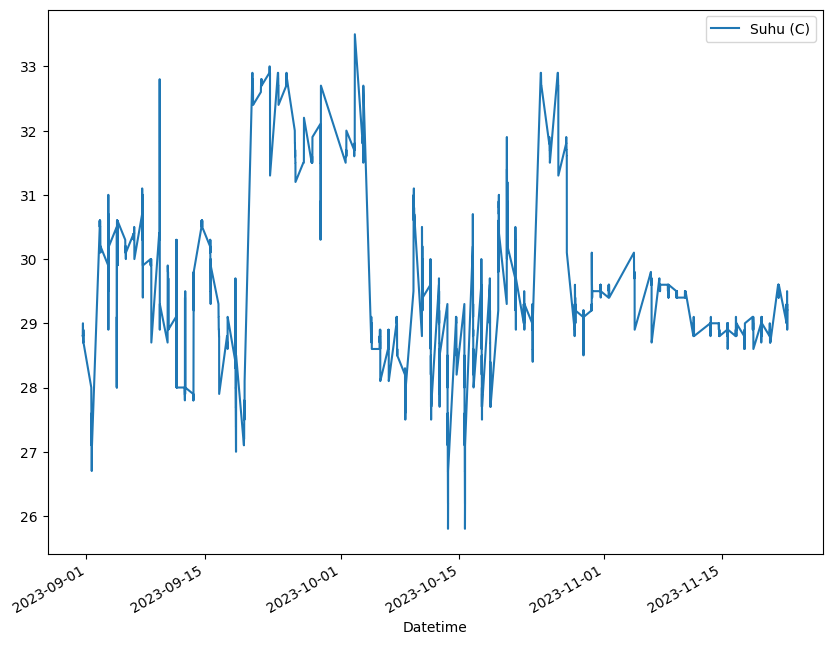

In [ ]:
# Set Datetime as index
new_df = df.set_index('Datetime')[['Suhu (C)', 'Kelembaban (%)']].plot(subplots=True)

In [ ]:
df.count()

Suhu (C)          9906
Kelembaban (%)    9906
Datetime          9906
dtype: int64

In [ ]:
features = df[['Suhu (C)', 'Kelembaban (%)']].to_numpy().tolist()
target = df['Suhu (C)'].tolist()

In [ ]:
features[0:11]

[[28.8, '88.4'],
 [28.8, '88.5'],
 [28.9, '88.5'],
 [28.8, '88.5'],
 [28.9, '88.3'],
 [28.9, '88.4'],
 [28.8, '88.4'],
 [28.8, '88.5'],
 [28.9, '88.5'],
 [28.8, '88.5'],
 [28.9, '88.6']]

In [ ]:
target[0:11]

[28.8, 28.8, 28.9, 28.8, 28.9, 28.9, 28.8, 28.8, 28.9, 28.8, 28.9]

In [ ]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)

In [ ]:
ts_generator[0]

(array([[['28.8', '88.4'],
         ['28.8', '88.5'],
         ['28.9', '88.5'],
         ['28.8', '88.5'],
         ['28.9', '88.3'],
         ['28.9', '88.4']]], dtype='<U32'),
 array([28.8]))

In [ ]:
ts_generator[0][0][0].shape

(6, 2)

In [ ]:
len(ts_generator)

9900

# Main Code

In [ ]:
suhu = df['Suhu (C)']

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(suhu, WINDOW_SIZE)
X1.shape, y1.shape

((9901, 5, 1), (9901,))

In [ ]:
X_train1, y_train1 = X1[:6720], y1[:6720]
X_val1, y_val1 = X1[6720:9120], y1[6720:9120]
X_test1, y_test1 = X1[9120:], y1[9120:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((6720, 5, 1), (6720,), (2400, 5, 1), (2400,), (781, 5, 1), (781,))

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
210/210 [==============================] - 8s 27ms/step - loss: 855.2491 - root_mean_squared_error: 29.2446 - val_loss: 783.0661 - val_root_mean_squared_error: 27.9833
Epoch 2/100
210/210 [==============================] - 7s 35ms/step - loss: 685.2435 - root_mean_squared_error: 26.1772 - val_loss: 552.1959 - val_root_mean_squared_error: 23.4988
Epoch 3/100
210/210 [==============================] - 5s 25ms/step - loss: 474.7026 - root_mean_squared_error: 21.7877 - val_loss: 397.2378 - val_root_mean_squared_error: 19.9308
Epoch 4/100
210/210 [==============================] - 5s 24ms/step - loss: 349.1688 - root_mean_squared_error: 18.6861 - val_loss: 288.1072 - val_root_mean_squared_error: 16.9737
Epoch 5/100
210/210 [==============================] - 7s 32ms/step - loss: 243.2993 - root_mean_squared_error: 15.5981 - val_loss: 193.4131 - val_root_mean_squared_error: 13.9073
Epoch 6/100
210/210 [==============================] - 5s 23ms/step - loss: 167.1502 - root_mean_squ

In [ ]:
from keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

210/210 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,28.883039,28.9
1,28.892633,28.8
2,28.852802,28.8
3,28.827412,28.9
4,28.867205,28.8
...,...,...
6715,32.645447,32.7
6716,32.645447,32.7
6717,32.645447,32.7
6718,32.645443,32.7


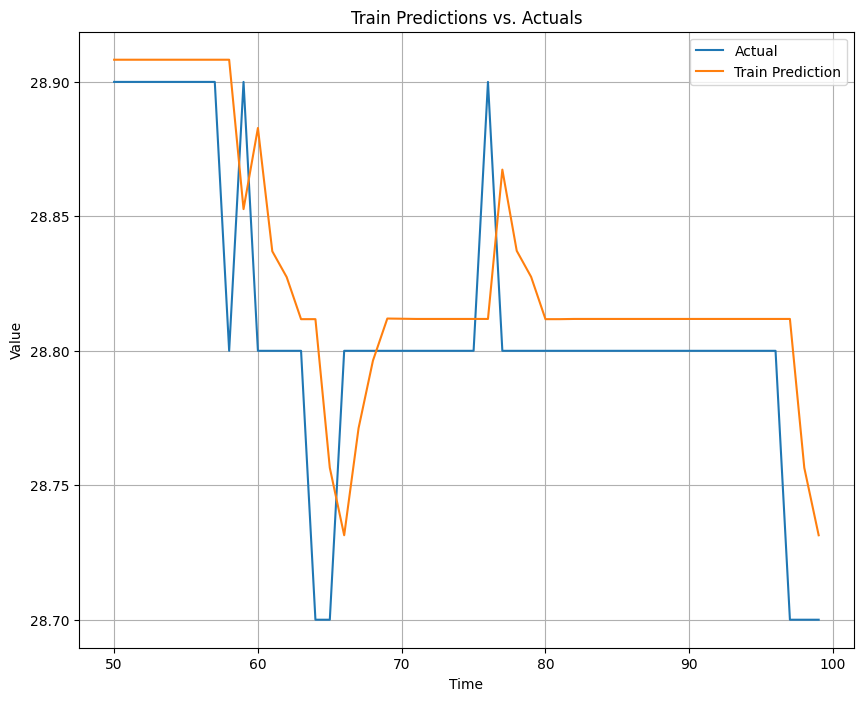

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Actuals'][50:100], label="Actual")
plt.plot(train_results['Train Predictions'][50:100], label="Train Prediction")

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Train Predictions vs. Actuals")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

75/75 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,32.645447,32.7
1,32.645447,32.7
2,32.645447,32.7
3,32.645447,32.7
4,32.645447,32.7
...,...,...
2395,28.908249,28.9
2396,28.908249,28.9
2397,28.908249,28.9
2398,28.908249,29.0


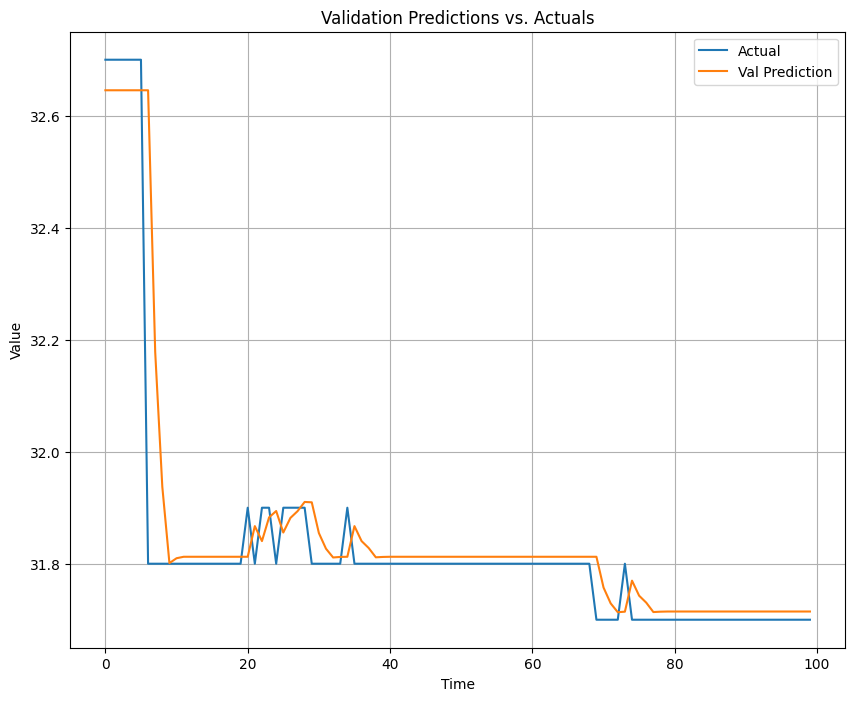

In [ ]:
plt.plot(val_results['Actuals'][:100], label='Actual')
plt.plot(val_results['Val Predictions'][:100], label='Val Prediction')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Validation Predictions vs. Actuals")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

25/25 [==============================] - 1s 3ms/step


,Test Predictions,Actuals
0,28.989594,29.0
1,29.005424,28.9
2,28.949539,28.9
3,28.923800,28.9
4,28.908037,28.9
...,...,...
776,29.086954,29.1
777,29.102900,29.1
778,29.102703,29.1
779,29.102596,29.2


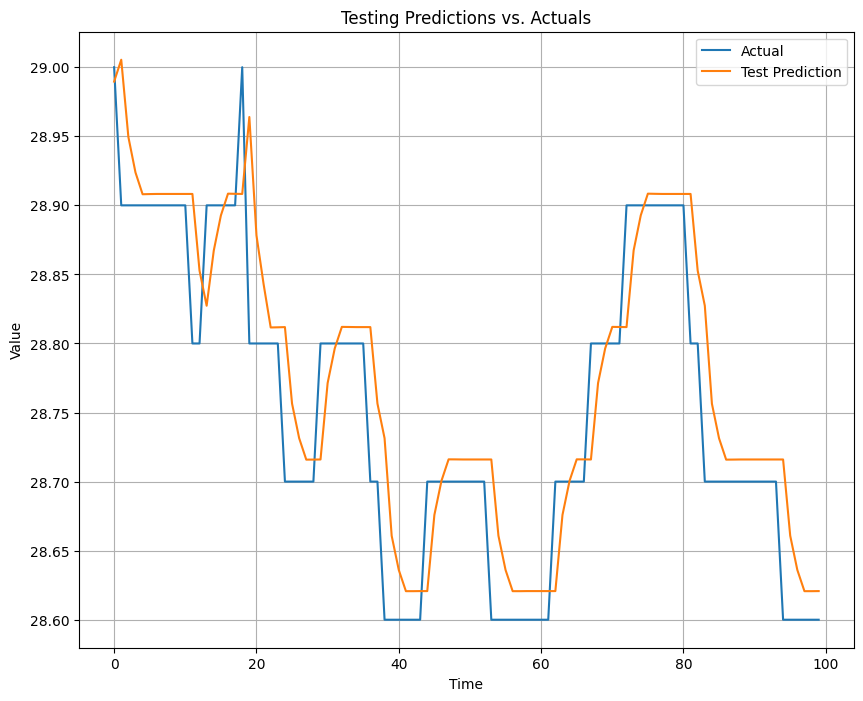

In [ ]:
plt.plot(test_results['Actuals'][:100], label='Actual')
plt.plot(test_results['Test Predictions'][:100], label='Test Prediction')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Testing Predictions vs. Actuals")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=200):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Actuals'][start:end], label="Actual")
  plt.plot(df['Predictions'][start:end], label="Prediction")

  # Add labels and title
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.title("0 ~ 200 Data Predictions vs. Actuals")

  # Add legend
  plt.legend()

  # Show the plot
  plt.grid(True)
  plt.show()
  return df, mse(predictions, y)

25/25 [==============================] - 0s 3ms/step


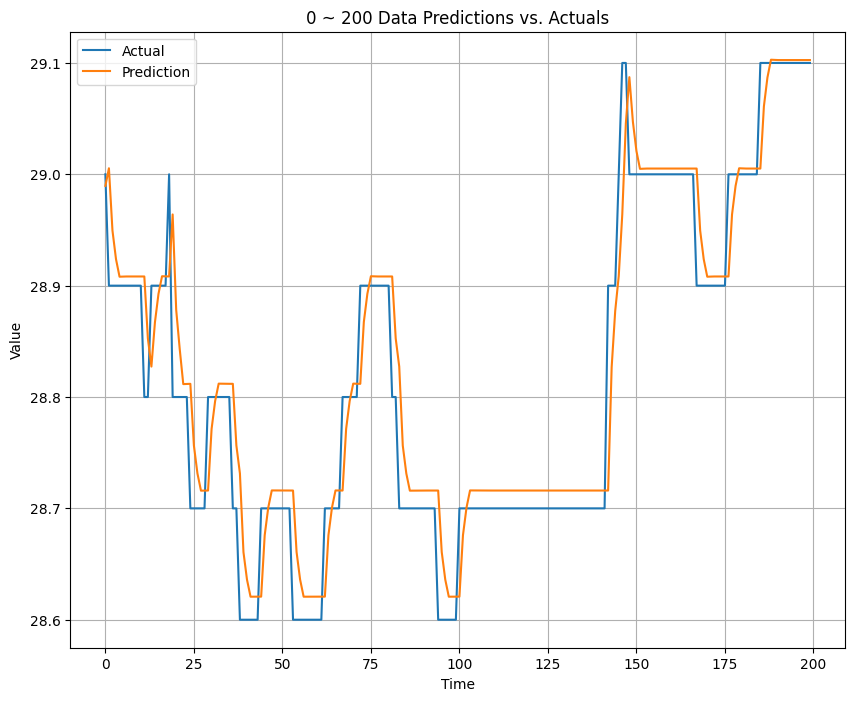

(     Predictions  Actuals
 0      28.989594     29.0
 1      29.005424     28.9
 2      28.949539     28.9
 3      28.923800     28.9
 4      28.908037     28.9
 ..           ...      ...
 776    29.086954     29.1
 777    29.102900     29.1
 778    29.102703     29.1
 779    29.102596     29.2
 780    29.158627     29.2
 
 [781 rows x 2 columns],
 0.00413037656059195)

In [ ]:
plot_predictions1(model1, X_test1, y_test1)